# JAVA TEAM

Safirah <br>
Rizki <br>
Rizky <br>

In [109]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.2
pandas version :  1.1.3
seaborn version :  0.11.0


## Load Dataset

In [110]:
df = pd.read_csv('application_train.csv')

## EDA

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [112]:
df.shape

(307511, 122)

In [113]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
df['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [115]:
df['DAYS_EMPLOYED'].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [116]:
df['AMT_INCOME_TOTAL'].head()

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [117]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

In [118]:
df['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [119]:
df['DAYS_EMPLOYED'].head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int64

In [120]:
df['YEAR_BIRTH'] = round((df['DAYS_BIRTH'] / 365),0)
df['YEAR_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: YEAR_BIRTH, dtype: float64

In [121]:
df['YEAR_EMPLOYED'] = round((df['DAYS_EMPLOYED'] / 365),0)
df['YEAR_EMPLOYED'].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: YEAR_EMPLOYED, dtype: float64

# Exploratory Data Analysis

## Descriptive Statistics

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to YEAR_EMPLOYED
dtypes: float64(67), int64(41), object(16)
memory usage: 290.9+ MB


In [123]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.938646,185.608021
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.964047,382.165887
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,3.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,6.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,54.000000,16.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000,1001.000000


In [124]:
df['AMT_INCOME_TOTAL'].max()

117000000.0

In [125]:
df['AMT_INCOME_TOTAL'].min()

25650.0

In [126]:
df['AMT_INCOME_TOTAL'].mean()

168797.9192969845

Data menunjukkan bahwa rata-rata usia pemohon adalah 43 tahun. usia termuda pemohon adalah 21 tahun sedangkan usia tertua pemohon adalah 69 tahun. <br>
rata- total pendapatan pemohon adalah 168.797 dengan pendapatan terbesar adalah 117.000.000 dan yang terendah adalah 25.650. <br>
rata-rata lama bekerja pemohon adalah 382 tahun. terdapat data pemohon yang sudah 1001 tahun bekerja dan terdapat pemohon yang belum berpengalaman bekerja.

## Missing Value

In [127]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
YEAR_BIRTH                        0
YEAR_EMPLOYED                     0
Length: 124, dtype: int64

In [128]:
df_train = df.isnull().sum()
df_train.sort_values(ascending=False)

COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
REG_REGION_NOT_LIVE_REGION          0
SK_ID_CURR                          0
Length: 124, dtype: int64

In [129]:
df.duplicated().sum()

0

### Cek missing value > 60%

In [130]:
df_persen = df_train/len(df['SK_ID_CURR'])*100
df_persen.sort_values(ascending=False)

COMMONAREA_MODE                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MEDI                69.872297
NONLIVINGAPARTMENTS_MEDI       69.432963
NONLIVINGAPARTMENTS_AVG        69.432963
                                 ...    
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
SK_ID_CURR                      0.000000
Length: 124, dtype: float64

In [131]:
df_persen.loc[df_persen >60]

OWN_CAR_AGE                 65.990810
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
FLOORSMIN_AVG               67.848630
LIVINGAPARTMENTS_AVG        68.354953
NONLIVINGAPARTMENTS_AVG     69.432963
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
FLOORSMIN_MODE              67.848630
LIVINGAPARTMENTS_MODE       68.354953
NONLIVINGAPARTMENTS_MODE    69.432963
YEARS_BUILD_MEDI            66.497784
COMMONAREA_MEDI             69.872297
FLOORSMIN_MEDI              67.848630
LIVINGAPARTMENTS_MEDI       68.354953
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
dtype: float64

### Drop kolom dengan missing value > 60%

In [132]:
cols = ['OWN_CAR_AGE','YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_AVG',
       'YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE',
       'YEARS_BUILD_MEDI','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE']

In [133]:
df2 = df.drop(cols,axis=1)

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 107 entries, SK_ID_CURR to YEAR_EMPLOYED
dtypes: float64(51), int64(41), object(15)
memory usage: 251.0+ MB


## Imputasi Numeric

In [135]:
df2.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 92 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   CNT_CHILDREN                  307511 non-null  int64  
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float64
 5   AMT_ANNUITY                   307499 non-null  float64
 6   AMT_GOODS_PRICE               307233 non-null  float64
 7   REGION_POPULATION_RELATIVE    307511 non-null  float64
 8   DAYS_BIRTH                    307511 non-null  int64  
 9   DAYS_EMPLOYED                 307511 non-null  int64  
 10  DAYS_REGISTRATION             307511 non-null  float64
 11  DAYS_ID_PUBLISH               307511 non-null  int64  
 12  FLAG_MOBIL                    307511 non-nul

Hapus data dengan keterangan _MODE dan _MEDI karena redundant dengan _AVG dan missing value untuk imputasi numeric akan diisi dengan rata-rata

In [136]:
cols_medmod = ['APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
               'LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI',
               'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','LANDAREA_MEDI','LIVINGAREA_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE']

In [137]:
df3 = df2.drop(cols_medmod,axis=1)

In [138]:
df3.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   DAYS_EMPLOYED                307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  FLAG_MOBIL                   307511 non-null  int64  
 13 

### Mengisi missing value dengan rata-rata

In [139]:
df3['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean(), inplace=True)
df3['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(), inplace=True)
df3['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean(), inplace=True)
df3['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean(), inplace=True)
df3['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].mean(), inplace=True)
df3['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace=True)
df3['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)
df3['APARTMENTS_AVG'].fillna(df['APARTMENTS_AVG'].mean(), inplace=True)
df3['BASEMENTAREA_AVG'].fillna(df['BASEMENTAREA_AVG'].mean(), inplace=True)
df3['YEARS_BEGINEXPLUATATION_AVG'].fillna(df['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)
df3['ELEVATORS_AVG'].fillna(df['ELEVATORS_AVG'].mean(), inplace=True)
df3['ENTRANCES_AVG'].fillna(df['ENTRANCES_AVG'].mean(), inplace=True)
df3['FLOORSMAX_AVG'].fillna(df['FLOORSMAX_AVG'].mean(), inplace=True)
df3['LANDAREA_AVG'].fillna(df['LANDAREA_AVG'].mean(), inplace=True)
df3['LIVINGAREA_AVG'].fillna(df['LIVINGAREA_AVG'].mean(), inplace=True)
df3['NONLIVINGAREA_AVG'].fillna(df['NONLIVINGAREA_AVG'].mean(), inplace=True)
df3['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df3['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df3['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df3['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df3['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)
df3['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(), inplace=True)
df3['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].mean(), inplace=True)
df3['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(), inplace=True)
df3['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].mean(), inplace=True)
df3['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].mean(), inplace=True)
df3['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)

## Imputasi Categorical

In [140]:
df3.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  HOUSETYPE_MODE              153214 non-null  object
 13  WALLSMATERIAL_MODE          1

In [141]:
df3['NAME_TYPE_SUITE'].fillna('Others', inplace=True)
df3['OCCUPATION_TYPE'].fillna('Others', inplace=True)
df3['HOUSETYPE_MODE'].fillna('Others', inplace=True)
df3['WALLSMATERIAL_MODE'].fillna('Others', inplace=True)
df3['EMERGENCYSTATE_MODE'].fillna('Others', inplace=True)

## Cek Missing Value

In [142]:
df3_cek = df3.isnull().sum()
df3_cek.sort_values(ascending=False)

YEAR_EMPLOYED       0
YEAR_BIRTH          0
FLAG_WORK_PHONE     0
FLAG_CONT_MOBILE    0
FLAG_PHONE          0
                   ..
FLAG_DOCUMENT_2     0
FLAG_DOCUMENT_3     0
FLAG_DOCUMENT_4     0
FLAG_DOCUMENT_5     0
SK_ID_CURR          0
Length: 88, dtype: int64

## Duplicated data

In [143]:
df3.duplicated().sum()

0

In [144]:
num =  ['SK_ID_CURR' ,  'Late', 'CNT_CHILDREN' ,  'AMT_INCOME_TOTAL' ,  'AMT_CREDIT',  'AMT_ANNUITY'                  
 , 'AMT_GOODS_PRICE',  'REGION_POPULATION_RELATIVE',  'DAYS_BIRTH',  'DAYS_EMPLOYED'      ,  'DAYS_REGISTRATION'            
 , 'DAYS_ID_PUBLISH',  'FLAG_MOBIL',  'FLAG_EMP_PHONE' ,  'FLAG_WORK_PHONE',  'FLAG_CONT_MOBILE'                 
 , 'FLAG_PHONE',  'FLAG_EMAIL' ,  'CNT_FAM_MEMBERS',  'REGION_RATING_CLIENT'             
 , 'REGION_RATING_CLIENT_W_CITY' ,  'HOUR_APPR_PROCESS_START',  'REG_REGION_NOT_LIVE_REGION'       
 , 'REG_REGION_NOT_WORK_REGION',  'LIVE_REGION_NOT_WORK_REGION' ,  'REG_CITY_NOT_LIVE_CITY'           
 , 'REG_CITY_NOT_WORK_CITY',  'LIVE_CITY_NOT_WORK_CITY',  'EXT_SOURCE_1'                 
 , 'EXT_SOURCE_2',  'EXT_SOURCE_3',  'APARTMENTS_AVG',  'BASEMENTAREA_AVG'             
 , 'YEARS_BEGINEXPLUATATION_AVG',  'ELEVATORS_AVG',  'ENTRANCES_AVG'               
 , 'FLOORSMAX_AVG',  'LANDAREA_AVG',  'LIVINGAREA_AVG'                  
 , 'NONLIVINGAREA_AVG',  'OBS_30_CNT_SOCIAL_CIRCLE',  'DEF_30_CNT_SOCIAL_CIRCLE'        
 , 'OBS_60_CNT_SOCIAL_CIRCLE',  'DEF_60_CNT_SOCIAL_CIRCLE',  'DAYS_LAST_PHONE_CHANGE'       
 , 'FLAG_DOCUMENT_2',  'FLAG_DOCUMENT_3',  'FLAG_DOCUMENT_4',  'FLAG_DOCUMENT_5',  'FLAG_DOCUMENT_6'                  
 , 'FLAG_DOCUMENT_7',  'FLAG_DOCUMENT_8',  'FLAG_DOCUMENT_9',  'FLAG_DOCUMENT_10'                 
 , 'FLAG_DOCUMENT_11',  'FLAG_DOCUMENT_12',  'FLAG_DOCUMENT_13',  'FLAG_DOCUMENT_14'                 
 , 'FLAG_DOCUMENT_15',  'FLAG_DOCUMENT_16',  'FLAG_DOCUMENT_17',  'FLAG_DOCUMENT_18'                 
 , 'FLAG_DOCUMENT_19',  'FLAG_DOCUMENT_20',  'FLAG_DOCUMENT_21'                 
 , 'AMT_REQ_CREDIT_BUREAU_HOUR' ,  'AMT_REQ_CREDIT_BUREAU_DAY'       
 , 'AMT_REQ_CREDIT_BUREAU_WEEK',  'AMT_REQ_CREDIT_BUREAU_MON'       
 , 'AMT_REQ_CREDIT_BUREAU_QRT',  'AMT_REQ_CREDIT_BUREAU_YEAR'      
 , 'YEAR_BIRTH',  'YEAR_EMPLOYED' ]
cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR'                   
, 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE'               
, 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE'              
, 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'     
, 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE'              
, 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [145]:
df3[cat].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,8,8,5,6,6,19,7,58,4,7,3
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Others,TUESDAY,Business Entity Type 3,Others,Others,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,96391,53901,67992,154297,157966,159428


## Random sample

Menggunakan stratified random sampling dengan sample 10% dari dataset

In [147]:
df_sample = df3.groupby(['TARGET']).apply(lambda x: x.sample(frac=0.1,random_state=123))

In [148]:
df_sample

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
TARGET                                                                          
0      242916      381209       0         Cash loans           F            N   
       112259      230229       0         Cash loans           F            Y   
       71881       183353       0         Cash loans           F            N   
       28988       133681       0         Cash loans           M            N   
       185409      314926       0         Cash loans           F            N   
...                   ...     ...                ...         ...          ...   
1      287571      433111       1         Cash loans           M            Y   
       219938      354794       1         Cash loans           F            Y   
       43267       150080       1         Cash loans           F            N   
       262574      404014       1         Cash loans           F            N   
       408         100472       1         Cash loans           M            Y   

              FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                                                                      
0      242916               Y             0           77850.0    284400.0   
       112259               Y             1          270000.0    715095.0   
       71881                Y             0          189000.0    754740.0   
       28988                Y             0          157500.0    180000.0   
       185409               Y             0          180000.0   1039500.0   
...                       ...           ...               ...         ...   
1      287571               Y             1          270000.0    547344.0   
       219938               N             0          135000.0    942300.0   
       43267                N             1           90000.0    101880.0   
       262574               N             2          112500.0    679500.0   
       408                  Y             1          135000.0    545040.0   

               AMT_ANNUITY  ...  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
TARGET                      ...                                      
0      242916      10215.0  ...                 0                0   
       112259      49900.5  ...                 0                0   
       71881       24475.5  ...                 0                0   
       28988       21492.0  ...                 0                0   
       185409      44172.0  ...                 0                0   
...                    ...  ...               ...              ...   
1      287571      33615.0  ...                 0                0   
       219938      26041.5  ...                 0                0   
       43267       10053.0  ...                 0                0   
       262574      22455.0  ...                 0                0   
       408         26509.5  ...                 0                0   

              AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
TARGET                                                               
0      242916                   0.000000                     0.000   
       112259                   0.000000                     0.000   
       71881                    0.006402                     0.007   
       28988                    0.000000                     0.000   
       185409                   0.006402                     0.007   
...                                  ...                       ...   
1      287571                   0.000000                     0.000   
       219938                   0.000000                     0.000   
       43267                    0.000000                     0.000   
       262574                   0.000000                     0.000   
       408                      0.000000                     0.000   

              AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
TARGET                                                             

In [149]:
df_sample['TARGET'].value_counts()

0    28269
1     2482
Name: TARGET, dtype: int64

## Drop ID

In [150]:
df_sample.drop(['SK_ID_CURR'],axis=1,inplace= True)

## Tes korelasi

### Data numeric

In [151]:
df_tescor = df_sample.select_dtypes('number')

In [152]:
df_tescor.corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.063890
REGION_RATING_CLIENT           0.062404
REG_CITY_NOT_WORK_CITY         0.055244
DAYS_LAST_PHONE_CHANGE         0.054977
                                 ...   
EXT_SOURCE_1                  -0.099855
EXT_SOURCE_2                  -0.147440
EXT_SOURCE_3                  -0.158636
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_12                    NaN
Name: TARGET, Length: 72, dtype: float64

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
mask = np.zeros_like(df_tescor.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

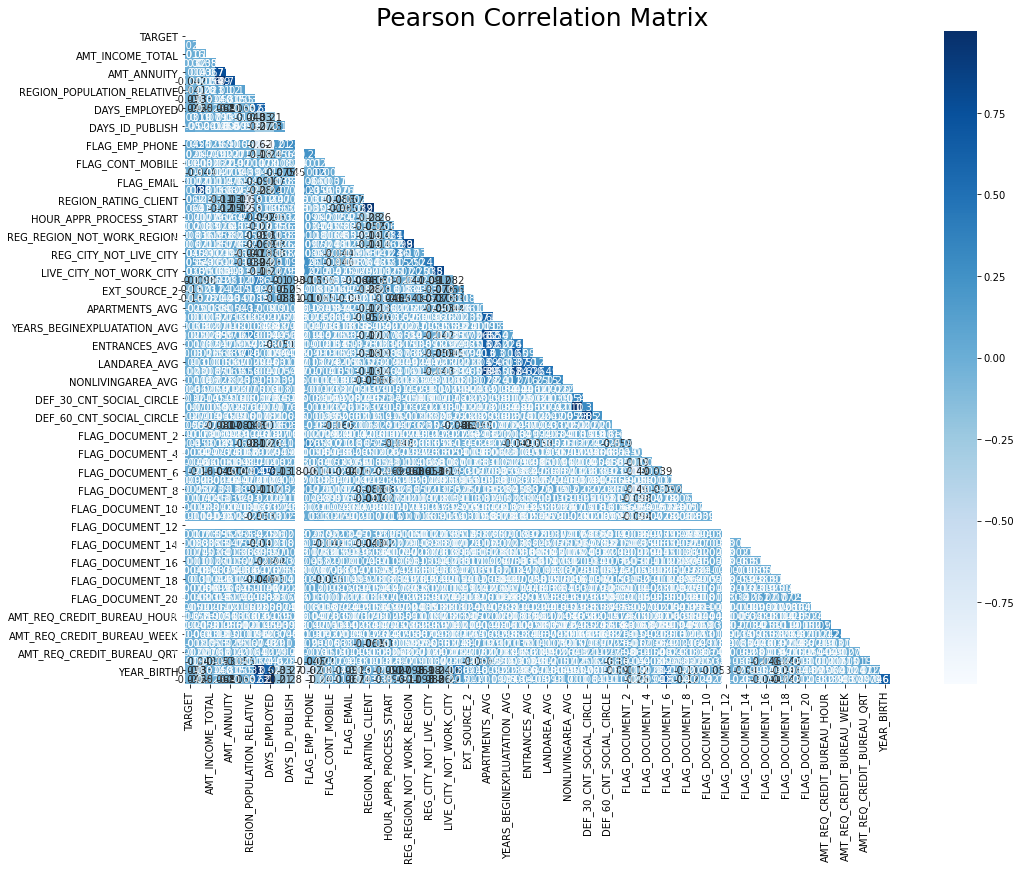

In [155]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df_tescor.corr(),
            cmap="Blues", 
            annot=True,
            mask=mask)

## Mengecek outlier

In [156]:
from scipy import stats

In [157]:
df_tescor3 = df_sample.select_dtypes('number')

### Menggunakan Z-score

In [158]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_tescor3)}')

filtered_entries = np.array([True] * len(df_tescor3))
for col in df_tescor3:
    zscore = abs(stats.zscore(df_tescor3[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df3_outlier = df_tescor3[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_tescor3)}')

Jumlah baris sebelum memfilter outlier: 30751
Jumlah baris setelah memfilter outlier: 30751


### Menggunakan IQR

In [159]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_tescor3)}')

filtered_entries = np.array([True] * len(df_tescor3))
for col in df_tescor3:
    Q1 = df_tescor3[col].quantile(0.25)
    Q3 = df_tescor3[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_tescor3[col] >= low_limit) & (df_tescor3[col] <= high_limit)) & filtered_entries
    
df_tescor3 = df_tescor3[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_tescor3)}')

Jumlah baris sebelum memfilter outlier: 30751
Jumlah baris setelah memfilter outlier: 621


## Encoding

In [160]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30751 entries, (0, 242916) to (1, 408)
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       30751 non-null  int64  
 1   NAME_CONTRACT_TYPE           30751 non-null  object 
 2   CODE_GENDER                  30751 non-null  object 
 3   FLAG_OWN_CAR                 30751 non-null  object 
 4   FLAG_OWN_REALTY              30751 non-null  object 
 5   CNT_CHILDREN                 30751 non-null  int64  
 6   AMT_INCOME_TOTAL             30751 non-null  float64
 7   AMT_CREDIT                   30751 non-null  float64
 8   AMT_ANNUITY                  30751 non-null  float64
 9   AMT_GOODS_PRICE              30751 non-null  float64
 10  NAME_TYPE_SUITE              30751 non-null  object 
 11  NAME_INCOME_TYPE             30751 non-null  object 
 12  NAME_EDUCATION_TYPE          30751 non-null  object 
 13  NAM

In [161]:
df_sample.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
TARGET                                                              
0      242916       0         Cash loans           F            N   
       112259       0         Cash loans           F            Y   
       71881        0         Cash loans           F            N   
       28988        0         Cash loans           M            N   
       185409       0         Cash loans           F            N   

              FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                                                                      
0      242916               Y             0           77850.0    284400.0   
       112259               Y             1          270000.0    715095.0   
       71881                Y             0          189000.0    754740.0   
       28988                Y             0          157500.0    180000.0   
       185409               Y             0          180000.0   1039500.0   

               AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_20  \
TARGET                                       ...                    
0      242916      10215.0         225000.0  ...                0   
       112259      49900.5         675000.0  ...                0   
       71881       24475.5         630000.0  ...                0   
       28988       21492.0         180000.0  ...                0   
       185409      44172.0        1039500.0  ...                0   

              FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
TARGET                                                      
0      242916                0                   0.000000   
       112259                0                   0.000000   
       71881                 0                   0.006402   
       28988                 0                   0.000000   
       185409                0                   0.006402   

              AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
TARGET                                                               
0      242916                     0.000                   0.000000   
       112259                     0.000                   0.000000   
       71881                      0.007                   0.034362   
       28988                      0.000                   0.000000   
       185409                     0.007                   0.034362   

               AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
TARGET                                                                
0      242916                   0.000000                   0.000000   
       112259                   0.000000                   0.000000   
       71881                    0.267395                   0.265474   
       28988                    1.000000                   0.000000   
       185409                   0.267395                   0.265474   

               AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  YEAR_EMPLOYED  
TARGET                                                                
0      242916                    0.000000        56.0            1.0  
       112259                    0.000000        41.0            2.0  
       71881                     1.899974        28.0            3.0  
       28988                     1.000000        25.0            2.0  
       185409                    1.899974        61.0         1001.0  

[5 rows x 87 columns]

In [162]:
df_dummy = pd.get_dummies(df_sample)

In [163]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30751 entries, (0, 242916) to (1, 408)
Columns: 209 entries, TARGET to EMERGENCYSTATE_MODE_Yes
dtypes: float64(32), int64(40), uint8(137)
memory usage: 22.5 MB


In [164]:
df_dummy.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                                                              
0      242916       0             0           77850.0    284400.0   
       112259       0             1          270000.0    715095.0   
       71881        0             0          189000.0    754740.0   
       28988        0             0          157500.0    180000.0   
       185409       0             0          180000.0   1039500.0   

               AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                                                                    
0      242916      10215.0         225000.0                    0.007330   
       112259      49900.5         675000.0                    0.046220   
       71881       24475.5         630000.0                    0.001276   
       28988       21492.0         180000.0                    0.015221   
       185409      44172.0        1039500.0                    0.014520   

               DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
TARGET                                                       ...   
0      242916       20420            233            -7725.0  ...   
       112259       15120            892            -2310.0  ...   
       71881        10372           1151            -1370.0  ...   
       28988         9268            667            -5936.0  ...   
       185409       22200         365243           -10263.0  ...   

               WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
TARGET                                                              
0      242916                         0                         0   
       112259                         0                         0   
       71881                          0                         0   
       28988                          0                         0   
       185409                         0                         0   

               WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
TARGET                                                                    
0      242916                              0                          1   
       112259                              0                          1   
       71881                               0                          0   
       28988                               0                          0   
       185409                              0                          0   

               WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
TARGET                                                                     
0      242916                         0                                0   
       112259                         0                                0   
       71881                          0                                1   
       28988                          1                                0   
       185409                         1                                0   

               WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  \
TARGET                                                             
0      242916                          0                       0   
       112259                          0                       0   
       71881                           0                       1   
       28988                           0                       1   
       185409                          0                       1   

               EMERGENCYSTATE_MODE_Others  EMERGENCYSTATE_MODE_Yes  
TARGET                                                              
0      242916                           1                        0  
       112259                           1                        0  
       71881                            0                        0  
       28988                            0                        0  
       185409                           0                        0  

[5 rows x 209 columns]

# Visualisasi

In [165]:
df_sample.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30751 entries, (0, 242916) to (1, 408)
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAME_CONTRACT_TYPE          30751 non-null  object
 1   CODE_GENDER                 30751 non-null  object
 2   FLAG_OWN_CAR                30751 non-null  object
 3   FLAG_OWN_REALTY             30751 non-null  object
 4   NAME_TYPE_SUITE             30751 non-null  object
 5   NAME_INCOME_TYPE            30751 non-null  object
 6   NAME_EDUCATION_TYPE         30751 non-null  object
 7   NAME_FAMILY_STATUS          30751 non-null  object
 8   NAME_HOUSING_TYPE           30751 non-null  object
 9   OCCUPATION_TYPE             30751 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  30751 non-null  object
 11  ORGANIZATION_TYPE           30751 non-null  object
 12  HOUSETYPE_MODE              30751 non-null  object
 13  WALLSMATERIAL_MODE          30751

In [166]:
df_sample.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30751 entries, (0, 242916) to (1, 408)
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       30751 non-null  int64  
 1   CNT_CHILDREN                 30751 non-null  int64  
 2   AMT_INCOME_TOTAL             30751 non-null  float64
 3   AMT_CREDIT                   30751 non-null  float64
 4   AMT_ANNUITY                  30751 non-null  float64
 5   AMT_GOODS_PRICE              30751 non-null  float64
 6   REGION_POPULATION_RELATIVE   30751 non-null  float64
 7   DAYS_BIRTH                   30751 non-null  int64  
 8   DAYS_EMPLOYED                30751 non-null  int64  
 9   DAYS_REGISTRATION            30751 non-null  float64
 10  DAYS_ID_PUBLISH              30751 non-null  int64  
 11  FLAG_MOBIL                   30751 non-null  int64  
 12  FLAG_EMP_PHONE               30751 non-null  int64  
 13  FLA

In [170]:
df3_cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR'                   
, 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE'               
, 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE'              
, 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'     
, 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE'              
, 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] 
df3_num = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL'                 
, 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'                   
, 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS'                  
, 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'       
, 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION'        
, 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY'            
, 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'           
, 'YEARS_BEGINEXPLUATATION_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE'         
, 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'         
, 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'           
, 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_7'                   
, 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'        
, 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED']  

In [171]:
df_sample[df3_cat].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,30751,30751,30751,30751,30751,30751,30751,30751,30751,30751,30751,30751,30751,30751,30751
unique,2,2,2,2,8,6,5,6,6,19,7,58,4,7,3
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Others,TUESDAY,Business Entity Type 3,Others,Others,No
freq,27842,20313,20312,21356,24895,15754,21845,19636,27396,9675,5396,6860,15273,15625,16069


In [172]:
df_sample[df3_num].describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_7,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED
count,30751.000000,30751.000000,3.075100e+04,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,...,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000
mean,0.080713,0.418425,1.717813e+05,16074.486358,-5021.461676,-2991.424084,0.817892,0.201294,0.998211,2.150569,...,1.380776,0.096482,-967.726676,0.711326,0.000098,0.006549,0.006889,1.880875,44.044714,187.688465
std,0.272398,0.715613,6.806855e+05,4370.317118,3547.216630,1517.491493,0.385940,0.400974,0.042254,0.907760,...,2.276140,0.352364,831.284433,0.453153,0.009877,0.077323,0.100687,1.741001,11.982656,383.781020
min,0.000000,0.000000,2.700000e+04,7489.000000,-22858.000000,-6226.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,-4185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,12424.500000,-7547.500000,-4303.500000,1.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,-1577.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000,3.000000
50%,0.000000,0.000000,1.485000e+05,15806.000000,-4527.000000,-3266.000000,1.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,-762.000000,1.000000,0.000000,0.000000,0.000000,1.899974,43.000000,6.000000
75%,0.000000,1.000000,2.025000e+05,19730.000000,-2032.000000,-1718.000000,1.000000,0.000000,1.000000,3.000000,...,2.000000,0.000000,-273.000000,1.000000,0.000000,0.000000,0.000000,3.000000,54.000000,16.000000
max,1.000000,5.000000,1.170000e+08,25196.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000,...,25.000000,5.000000,0.000000,1.000000,1.000000,2.000000,6.000000,21.000000,69.000000,1001.000000


In [173]:
df3_cat1 = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR'                   
, 'FLAG_OWN_REALTY'] 
df3_cat2 = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE'               
, 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']
df3_cat3 = ['NAME_HOUSING_TYPE'              
, 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'     
, 'ORGANIZATION_TYPE']
df3_cat4 = ['ORGANIZATION_TYPE', 'HOUSETYPE_MODE'              
, 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
df3_num1 = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL'                 
, 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
df3_num2 = ['FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS'                  
, 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
df3_num3 = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION'        
, 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY'            
, 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df3_num4 = ['YEARS_BEGINEXPLUATATION_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE'         
, 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'         
, 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
df3_num5 = ['FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_7'                   
, 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'        
, 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED']

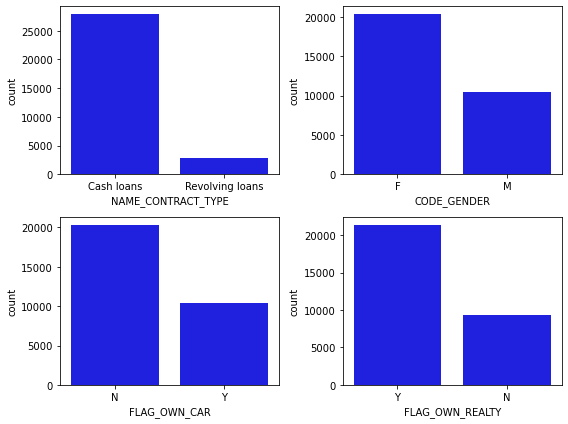

In [174]:
plt.figure(figsize=(8,6))
for i in range(0,len(df3_cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(df_sample[df3_cat1[i]],color='blue')
    plt.tight_layout()

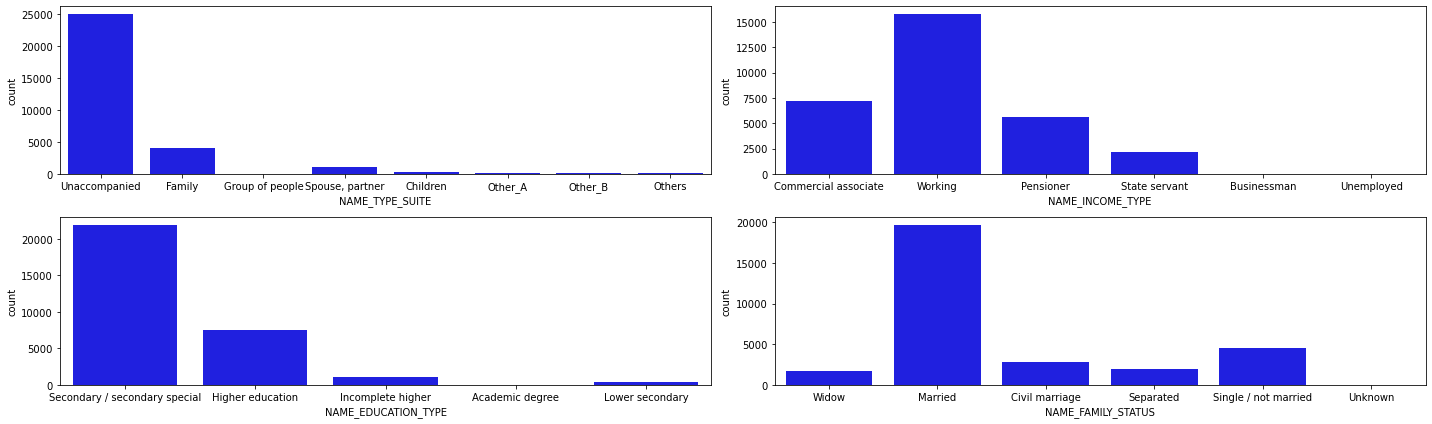

In [175]:
plt.figure(figsize=(20,6))
for i in range(0,len(df3_cat2)):
    plt.subplot(2,2,i+1)
    sns.countplot(df_sample[df3_cat2[i]],color='blue')
    plt.tight_layout()

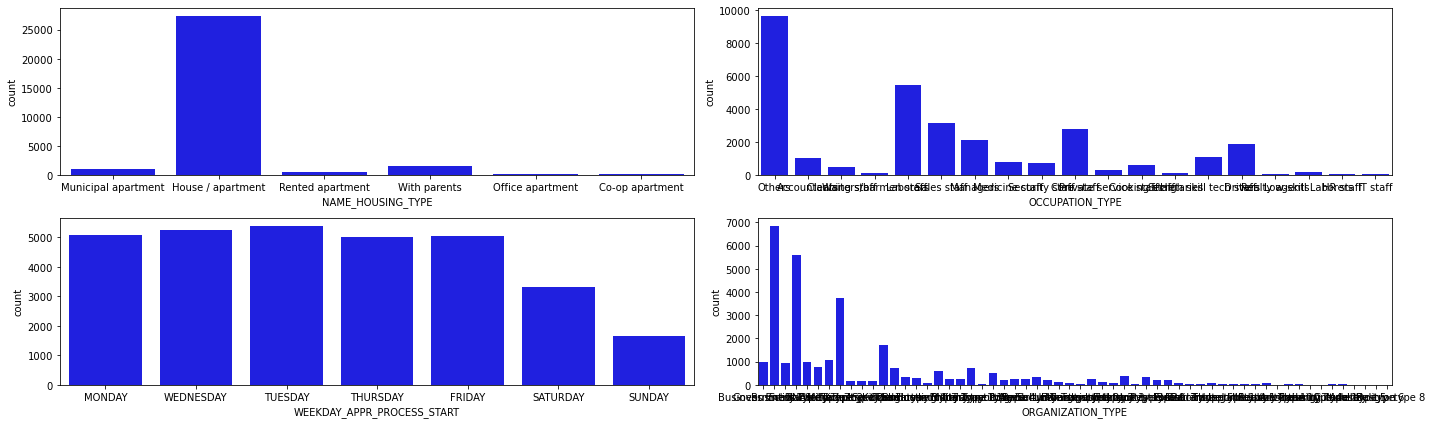

In [176]:
plt.figure(figsize=(20,6))
for i in range(0,len(df3_cat3)):
    plt.subplot(2,2,i+1)
    sns.countplot(df_sample[df3_cat3[i]],color='blue')
    plt.tight_layout()

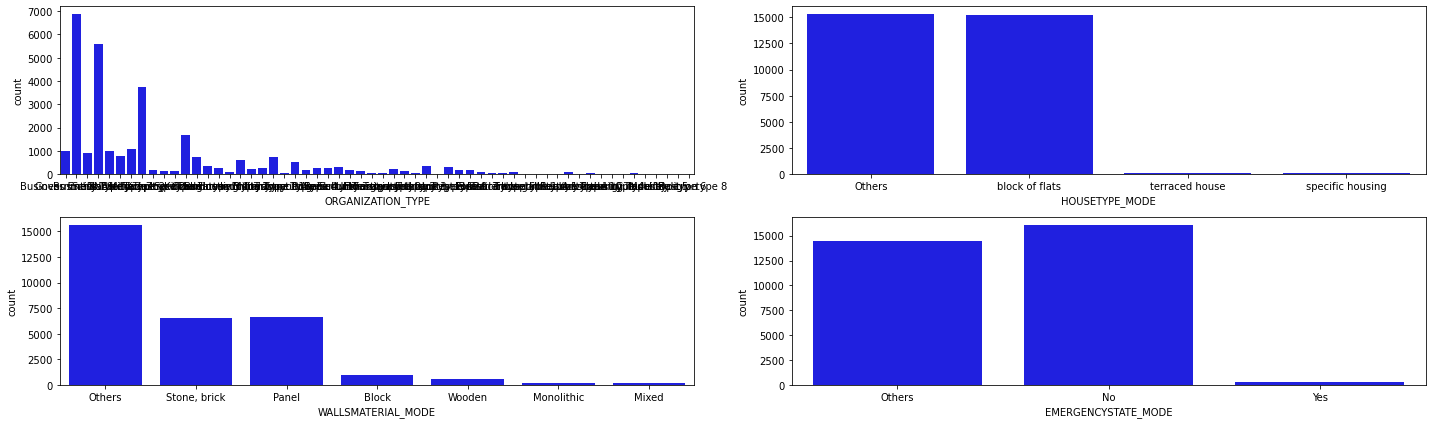

In [177]:
plt.figure(figsize=(20,6))
for i in range(0,len(df3_cat4)):
    plt.subplot(2,2,i+1)
    sns.countplot(df_sample[df3_cat4[i]],color='blue')
    plt.tight_layout()

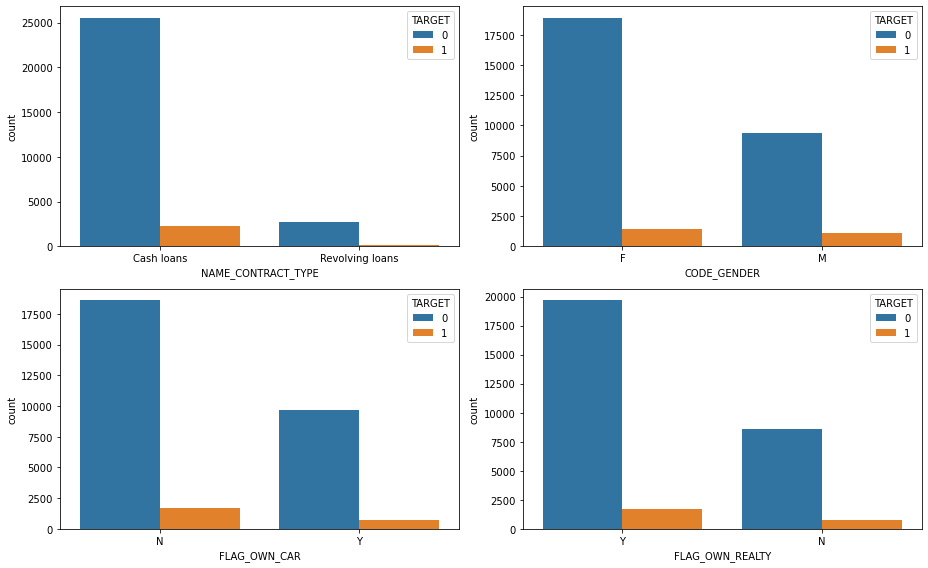

In [257]:
plt.figure(figsize=(13,8))
for i in range(0,len(df3_cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_sample[df3_cat1[i]], hue="TARGET", data=df_sample)
    plt.tight_layout();

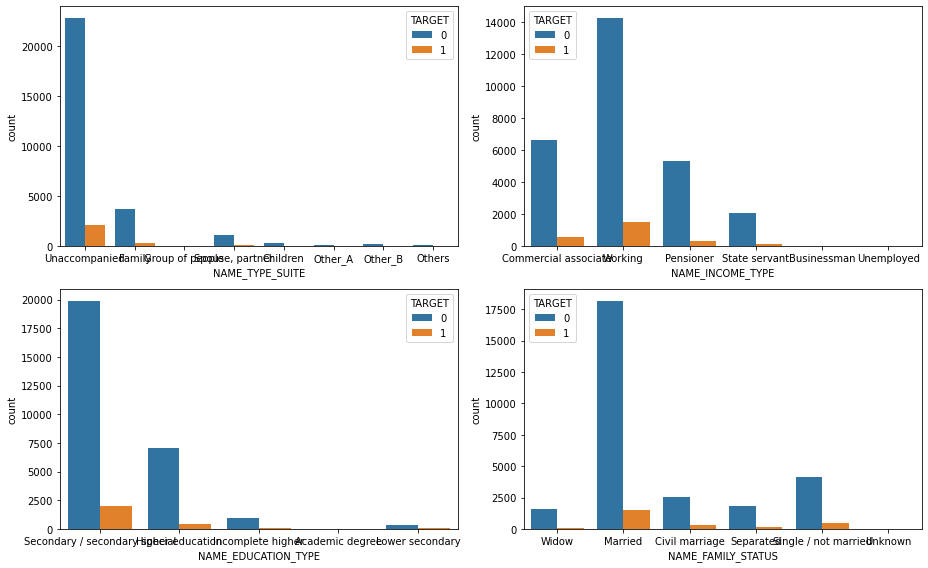

In [258]:
plt.figure(figsize=(13,8))
for i in range(0,len(df3_cat2)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_sample[df3_cat2[i]], hue="TARGET", data=df_sample)
    plt.tight_layout();

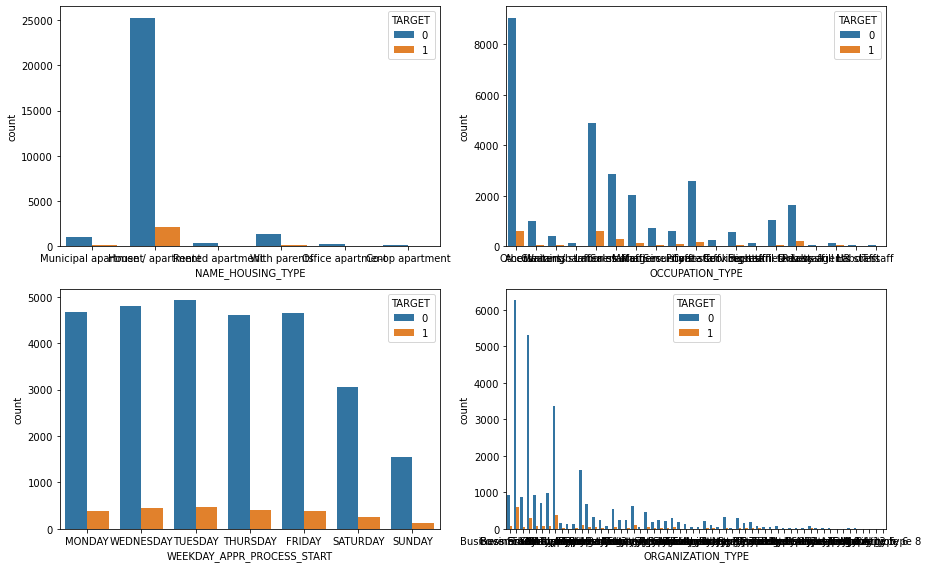

In [259]:
plt.figure(figsize=(13,8))
for i in range(0,len(df3_cat3)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_sample[df3_cat3[i]], hue="TARGET", data=df_sample)
    plt.tight_layout();

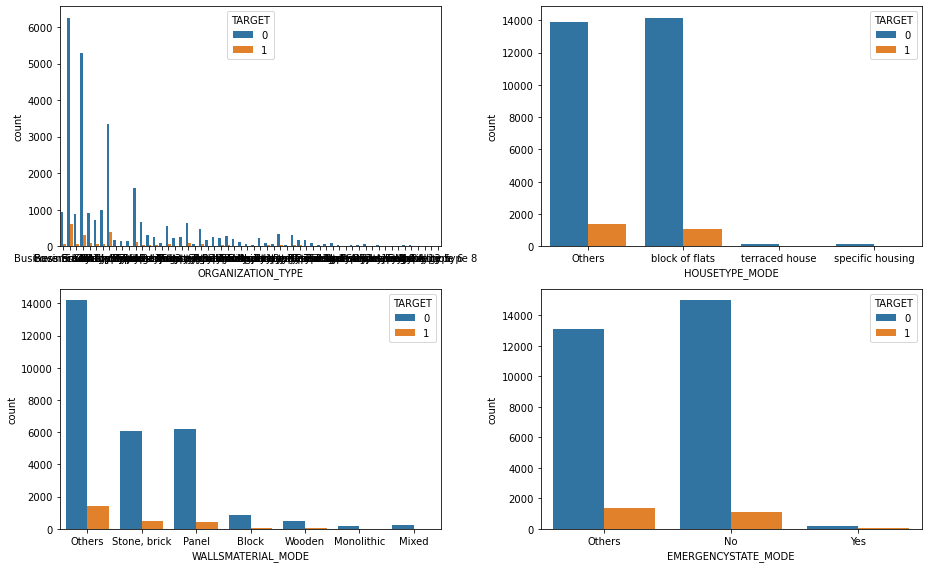

In [260]:
plt.figure(figsize=(13,8))
for i in range(0,len(df3_cat4)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_sample[df3_cat4[i]], hue="TARGET", data=df_sample)
    plt.tight_layout();

In [179]:
cols_negatif = ['Late'
, 'EXT_SOURCE_1'
, 'EXT_SOURCE_2'
, 'EXT_SOURCE_3'
, 'YEARS_BIRTH'
, 'DAYS_BIRTH'
, 'DAYS_EMPLOYED']
cols_positif = ['Late'
, 'OBS_60_CNT_SOCIAL_CIRCLE'
, 'OBS_30_CNT_SOCIAL_CIRCLE'
, 'CNT_FAM_MEMBERS'
, 'CNT_CHILDREN'
, 'AMT_REQ_CREDIT_BUREAU_YEAR'
, 'FLAG_WORK_PHONE']

<Figure size 576x288 with 0 Axes>

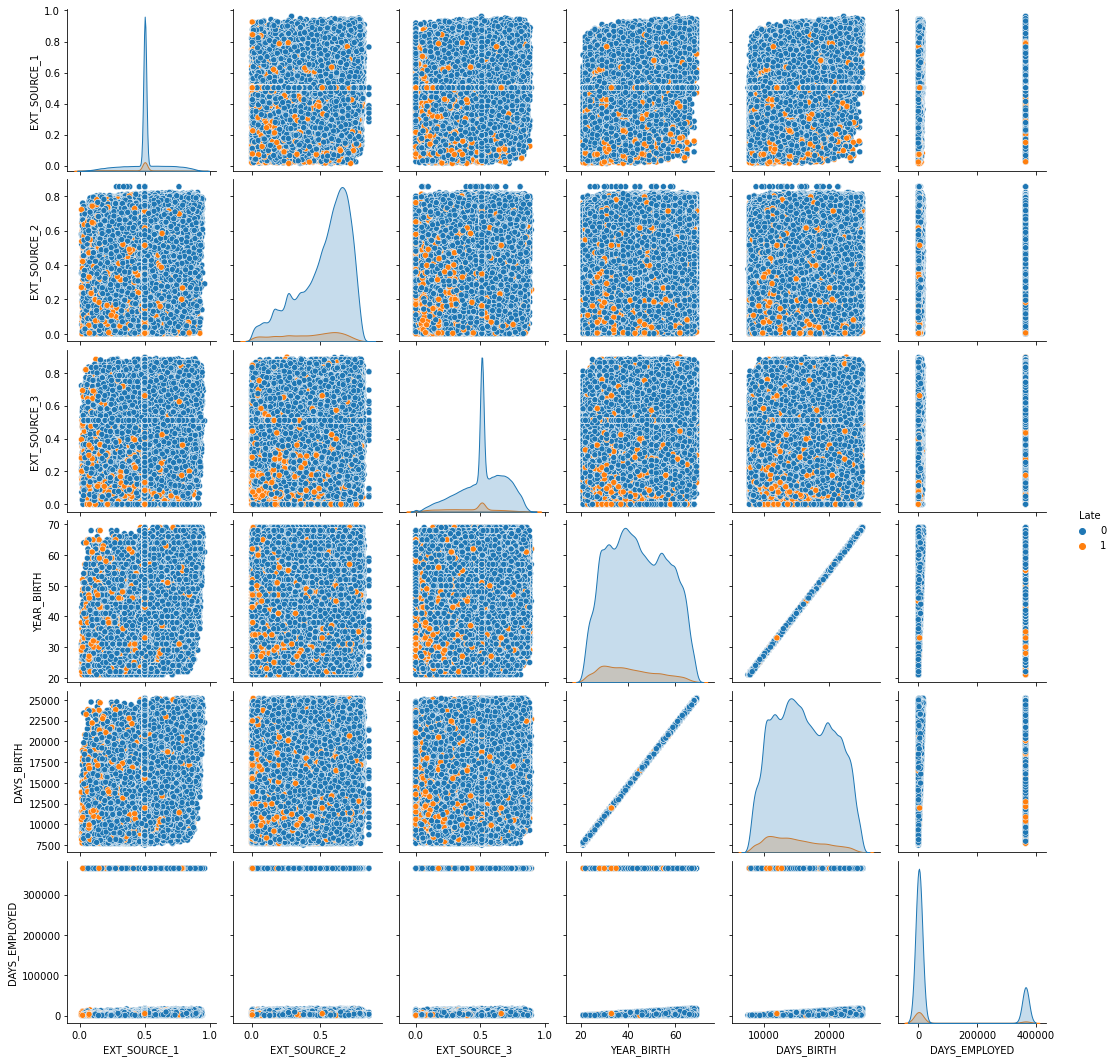

In [107]:
plt.figure(figsize = (8,4))

cols_negatif = ['Late'
, 'EXT_SOURCE_1'
, 'EXT_SOURCE_2'
, 'EXT_SOURCE_3'
, 'YEAR_BIRTH'
, 'DAYS_BIRTH'
, 'DAYS_EMPLOYED']

sns.pairplot(data=df3[cols_negatif], hue='TARGET')

<Figure size 576x288 with 0 Axes>

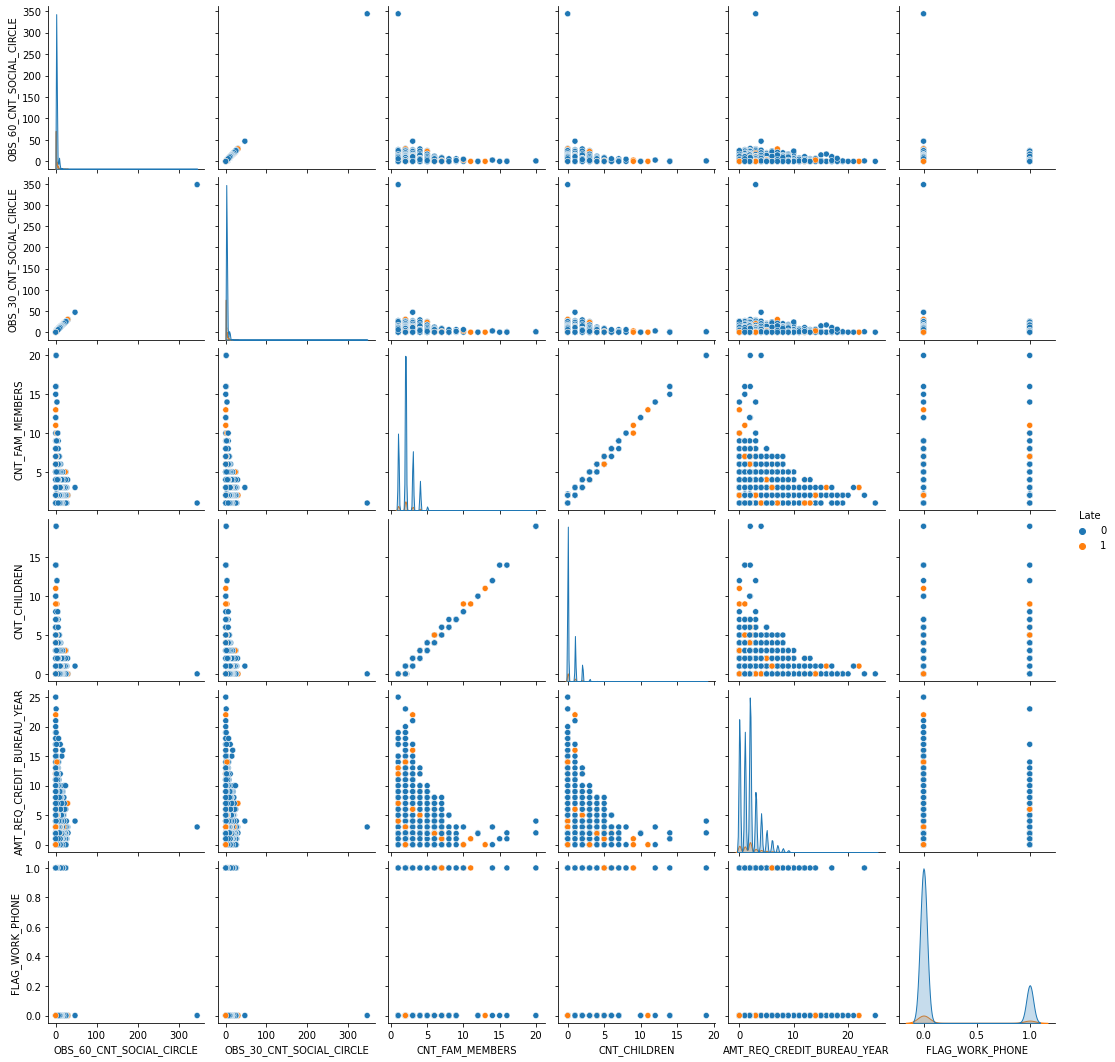

In [108]:
plt.figure(figsize = (8,4))

cols_positif = ['Late'
, 'OBS_60_CNT_SOCIAL_CIRCLE'
, 'OBS_30_CNT_SOCIAL_CIRCLE'
, 'CNT_FAM_MEMBERS'
, 'CNT_CHILDREN'
, 'AMT_REQ_CREDIT_BUREAU_YEAR'
, 'FLAG_WORK_PHONE']

sns.pairplot(data=df3[cols_positif], hue='TARGET')

## Preprocessing

In [180]:
df_dummy = pd.get_dummies(df_sample)

In [181]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30751 entries, (0, 242916) to (1, 408)
Columns: 209 entries, TARGET to EMERGENCYSTATE_MODE_Yes
dtypes: float64(32), int64(40), uint8(137)
memory usage: 22.5 MB


In [182]:
X = df_dummy.drop(['TARGET'],axis = 1)
y = df_dummy['TARGET']

## Standarization

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

In [184]:
X_scaler = pd.DataFrame(X_scaler,columns = X.columns)

In [185]:
# baseline
y.value_counts(normalize=True)*100

0    91.928718
1     8.071282
Name: TARGET, dtype: float64

## Train-Test Split

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size = 0.3,stratify = y,random_state = 123)

In [187]:
y_train.value_counts()

0    19788
1     1737
Name: TARGET, dtype: int64

## Imbalance Dataset

In [188]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler()
X_under, y_under = undersampling.fit_resample(X_train,y_train)

In [189]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_over, y_over = oversampling.fit_resample(X_train,y_train)

In [190]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [191]:
y_under.value_counts()

1    1737
0    1737
Name: TARGET, dtype: int64

In [192]:
y_over.value_counts()

1    19788
0    19788
Name: TARGET, dtype: int64

In [193]:
y_smote.value_counts()

1    19788
0    19788
Name: TARGET, dtype: int64

In [194]:
# new baseline
y_smote.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: TARGET, dtype: float64

# Machine Learning Modeling & Evaluation

In [213]:
def evaluasi(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)*100

In [214]:
def evaluasi_auc(model,X_test,y_test):
    from sklearn.metrics import roc_auc_score
    y_pred = model.predict_proba(X_test)
    return roc_auc_score(y_test,y_pred)*100

## Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_smote,y_smote)

LogisticRegression()

In [211]:
y_pred = model.predict(X_smote)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [216]:
evaluasi(logreg,X_test,y_test)

69.27162367223065

In [217]:
params ={'C':[0.01,0.1,1,2,3,5]}

In [218]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=logreg, # model yang akan digunakan
             param_grid=params, # hyperparameter yang dipilih
             scoring = 'accuracy', # metrics evaluation
             cv = 3 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [219]:
grid.fit(X_smote,y_smote)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5]}, scoring='accuracy')

In [220]:
grid.best_params_

{'C': 1}

In [221]:
grid.best_score_

0.7138922579341015

In [222]:
print('accuracy : {0:.5f}%'.format(grid.best_score_*100))

accuracy : 71.38923%


## k-Nearest Neighbor

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_smote,y_smote)

KNeighborsClassifier()

In [225]:
accuracy = evaluasi(knn,X_test,y_test)

In [226]:
print('accuracy : {0:.5f}%'.format(accuracy))

accuracy : 58.99631%


Tuning Hyperparameter

In [228]:
params = {'n_neighbors':[1,2,3,4,5]}

In [229]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=knn,
             param_grid=params,
             scoring = 'accuracy',
             cv = 3 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [230]:
grid.fit(X_smote,y_smote)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [231]:
grid.best_params_

{'n_neighbors': 2}

In [232]:
accuracy = evaluasi(grid,X_test,y_test)

In [233]:
print('accuracy : {0:.5f}%'.format(accuracy))

accuracy : 77.08649%


## Modeling Decicion Tree

In [261]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=4)

In [262]:
model_tree.fit(X_smote,y_smote)

DecisionTreeClassifier(max_depth=4)

In [263]:
accuracy = evaluasi(model_tree,X_test,y_test)

In [264]:
print('accuracy : {0:.5f}%'.format(accuracy))

accuracy : 72.00303%


In [265]:
from sklearn import tree

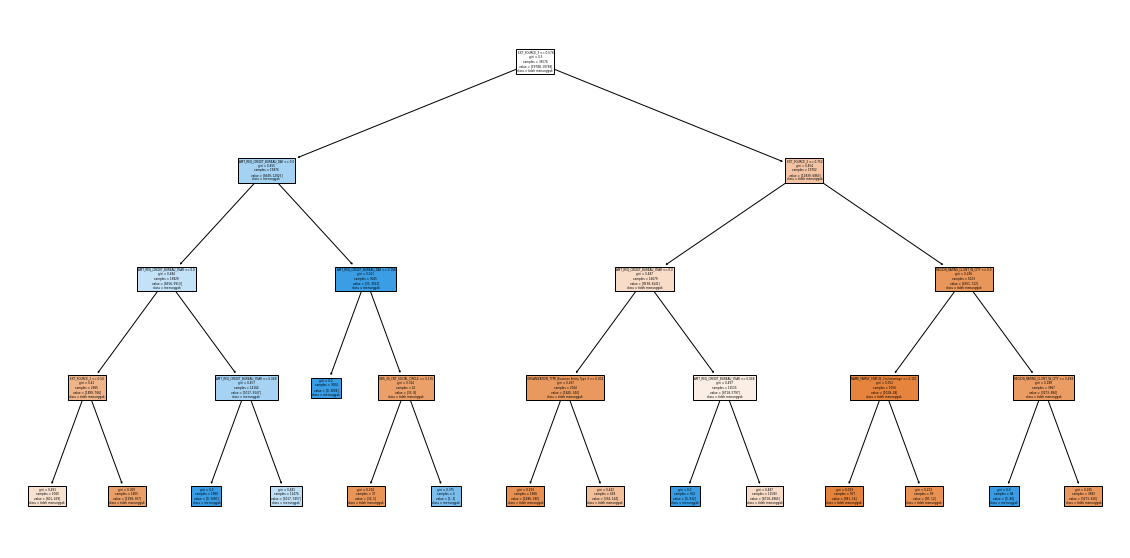

In [266]:
plt.figure(figsize = (20,10))
tree.plot_tree(model_tree,
               feature_names = X_train.columns,
               class_names = ['tidak menunggak','menunggak'],filled=True)
plt.show()

In [267]:
params ={'max_depth':[1,2,3,4,5,6,7,8,'max']}

In [268]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=model_tree, # model yang akan digunakan
             param_grid=params, # hyperparameter yang dipilih
             scoring = 'accuracy', # metrics evaluation
             cv = 3 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [269]:
grid.fit(X_smote,y_smote)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 'max']},
             scoring='accuracy')

In [270]:
grid.best_params_

{'max_depth': 8}

In [271]:
grid.best_score_

0.8193854861532243

In [272]:
print('accuracy : {0:.5f}%'.format(grid.best_score_*100))

accuracy : 81.93855%
